<div class="usecase-title">Analysing Trends in Community Wellbeing using CoMSIS Data</div>
<div class="usecase-authors">Author: Nidhi Kanchepalle</div>

<div class="usecase-level-skill">
    <div class="usecase-level">Level: Intermediate</div>
    <div class="usecase-skill">Skills: Python, Exploratory Data Analysis, Data Visualisation</div>
</div>

<div class="usecase-duration">Duration: {90} minutes</div>

---

<div class="usecase-section-header">Scenario</div>

_The City of Melbourne Social Indicators Survey (CoMSIS) has been conducted annually since 2018 to gather valuable insights into the health, wellbeing, safety, participation, and social connection of communities within the Melbourne Local Government Area. The survey is conducted through telephone and online channels, it supports the reporting of key municipal outcome indicators as outlined in the Council Plan 2021–2025. These indicators enable the council to assess the impact of existing initiatives and inform the planning of future programs. This use case focuses on analysing multi-year CoMSIS data (2018–2023) to understand how community sentiment has evolved over time. By uncovering trends and highlighting both high- and low-performing indicators, the analysis provides evidence-based insights to help the City of Melbourne better prioritise and refine its community initiatives._

---

<div class="usecase-section-header">What This Use Case Will Teach You</div>

At the end of this use case, you will be able to:
- Learn how to load data using APIs
- Handle missing values and prepare the data for meaningful analysis
- Use grouping, filtering, and aggregation techniques to uncover patterns and trends
- Create clear, informative visualisations to communicate trends using Matplotlib and Seaborn
- Visualise social indicators over time
- Interpret data to support actionable recommendations for local policy and planning


<div class="usecase-section-header">Background / Introduction</div>

Understanding the evolving needs and sentiments of a city’s population is essential for designing effective policies and community programs. The City of Melbourne Social Indicators Survey (CoMSIS), introduced in 2018, is conducted annually to gather resident insights across several key areas, including health, safety, wellbeing, participation, and social connection. The survey is administered through telephone and online methods, ensuring broad accessibility and representation from communities across the Melbourne Local Government Area.

A significant strength of the CoMSIS dataset lies in its ability to segment responses across demographic and geographic lines. The respondent_group column captures detailed subgroup information such as age brackets (e.g., 18–24 years, 65+ years) and residential locations (e.g., Docklands 3008, Carlton 3053). This enables a more nuanced understanding of how different segments of the population experience life in the city.

The result column holds the core measurement for each indicator, typically expressed as a percentage or average score depending on the nature of the question. This value allows us to quantify community sentiment and track how it evolves over time. When analysed across multiple years, these results offer valuable insights into long-term trends, shifts in public opinion, and the effectiveness of previous council initiatives.

By bringing together CoMSIS data from 2018 through 2023, this use case aims to identify trends in community wellbeing. The analysis also explores differences across various respondent groups, providing the Council with a clearer picture of which populations are thriving and which may require more targeted support. Ultimately, this kind of multi-year, group-level insight enables the City of Melbourne to refine its initiatives more effectively, ensuring they are inclusive, equitable, and aligned with the experiences of its diverse communities.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

##  Importing Data Through API

In [36]:


# Reading API key from a file
with open("API_Key.txt", "r", encoding="utf-8-sig") as f:
    API_KEY = f.read().strip()


# Defining function to fetch dataset using the API key
def API_upload(dataset_key):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    full_url = f'{base_url}{dataset_key}/exports/{format}'

    params = {
        'select': '*',
        'timezone': 'UTC',
        'lang': 'en',
        'limit': '-1'
    }

    headers = {
        'X-App-Token': API_KEY
    }

    response = requests.get(full_url, params=params, headers=headers)
    if response.status_code == 200:
        content = response.content.decode('utf-8')
        df = pd.read_csv(StringIO(content), delimiter=';')
        df['SOURCE_DATASET'] = dataset_key
        return df
    else:
        print(f"Error fetching data from {full_url}: {response.status_code}")
        return pd.DataFrame()

# Dataset IDs
datasets = [
    'social-indicators-for-city-of-melbourne-residents-2018',
    'social-indicators-for-city-of-melbourne-residents-2019',
    'social-indicators-for-city-of-melbourne-residents-2020',
    'social-indicators-for-city-of-melbourne-residents-2021',
    'social-indicators-for-city-of-melbourne-residents-2022',
    'social-indicators-for-city-of-melbourne-residents-2023'
]

# Load and combine
all_data = [API_upload(d) for d in datasets]
df_all_years = pd.concat(all_data, ignore_index=True)


##  Inspecting Data

In [37]:
print("\nCombined Dataset Shape:", df_all_years.shape)
print(df_all_years.head())


Combined Dataset Shape: (3918, 12)
  indicator                    type              topic  \
0         1  Council Plan Indicator  Physical activity   
1         1  Council Plan Indicator  Physical activity   
2         1  Council Plan Indicator  Physical activity   
3         1  Council Plan Indicator  Physical activity   
4         1  Council Plan Indicator  Physical activity   

                                 description  \
0  Participate in adequate physical activity   
1  Participate in adequate physical activity   
2  Participate in adequate physical activity   
3  Participate in adequate physical activity   
4  Participate in adequate physical activity   

                                            response  year  \
0  Yes, 30 minutes or more on 4 or more days per ...  2018   
1  Yes, 30 minutes or more on 4 or more days per ...  2018   
2  Yes, 30 minutes or more on 4 or more days per ...  2018   
3  Yes, 30 minutes or more on 4 or more days per ...  2018   
4  Yes, 30 minut

## Deleting unwanted columns

In [38]:
df = pd.DataFrame(df_all_years)
df.drop(columns=['SOURCE_DATASET', 'respondent_group0'], inplace=True)
df.columns

Index(['indicator', 'type', 'topic', 'description', 'response', 'year',
       'respondent_group', 'sample_size', 'result', 'format'],
      dtype='object')

In [39]:
df

indicator                    type              topic  \
0            1  Council Plan Indicator  Physical activity   
1            1  Council Plan Indicator  Physical activity   
2            1  Council Plan Indicator  Physical activity   
3            1  Council Plan Indicator  Physical activity   
4            1  Council Plan Indicator  Physical activity   
...        ...                     ...                ...   
3913         9                   Other    Quality of life   
3914         9                   Other    Quality of life   
3915         9                   Other    Quality of life   
3916         9                   Other    Quality of life   
3917         9                   Other    Quality of life   

                                    description  \
0     Participate in adequate physical activity   
1     Participate in adequate physical activity   
2     Participate in adequate physical activity   
3     Participate in adequate physical activity   
4     Participate in adequate physical activity   
...                                         ...   
3913          Satisfaction with life as a whole   
3914          Satisfaction with life as a whole   
3915          Satisfaction with life as a whole   
3916          Satisfaction with life as a whole   
3917          Satisfaction with life as a whole   

                                               response  year  \
0     Yes, 30 minutes or more on 4 or more days per ...  2018   
1     Yes, 30 minutes or more on 4 or more days per ...  2018   
2     Yes, 30 minutes or more on 4 or more days per ...  2018   
3     Yes, 30 minutes or more on 4 or more days per ...  2018   
4     Yes, 30 minutes or more on 4 or more days per ...  2018   
...                                                 ...   ...   
3913            Average satisfaction score (from 0-100)  2023   
3914            Average satisfaction score (from 0-100)  2023   
3915            Average satisfaction score (from 0-100)  2023   
3916            Average satisfaction score (from 0-100)  2023   
3917            Average satisfaction score (from 0-100)  2023   

                  respondent_group  sample_size  result    format  
0              East Melbourne 3002           79    57.7  Per cent  
1                   Melbourne 3000          264    55.0  Per cent  
2                      18-24 years          259    52.5  Per cent  
3                      55-64 years          142    58.7  Per cent  
4                        65+ years          270    58.9  Per cent  
...                            ...          ...     ...       ...  
3913                     65+ years          202    80.6   Average  
3914                  Carlton 3053          192    69.3   Average  
3915             City of Melbourne         1369    72.7   Average  
3916           East Melbourne 3002           69    78.7   Average  
3917  Kensington / Flemington 3031           89    74.0   Average  

[3918 rows x 10 columns]

The dataset includes several key columns that offer detailed insight into the social indicators surveyed across the City of Melbourne. The "topic and description columns" represent the main subject area (e.g., health, safety, or wellbeing) and the specific survey question or indicator. The response column captures how participants responded, while the result column indicates the proportion of people from the sample who agreed with or selected a particular response—expressed either as a percentage or an average score, depending on the value in the format column. The year column indicates when the data was collected, and the "respondent_group" specifies the demographic or geographic segment surveyed, such as age group, gender, or suburb. Finally, the "sample_size" column reflects the number of respondents within each group, providing context for the scale and reliability of the results

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   indicator         3918 non-null   object 
 1   type              3918 non-null   object 
 2   topic             3918 non-null   object 
 3   description       3918 non-null   object 
 4   response          3918 non-null   object 
 5   year              3918 non-null   int64  
 6   respondent_group  3254 non-null   object 
 7   sample_size       3918 non-null   int64  
 8   result            3918 non-null   float64
 9   format            3918 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 306.2+ KB


## Checking for missing values

In [41]:
missing_values = df.isna().sum()

# displaying columns with missing values
print("Missing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
respondent_group    664
dtype: int64


## Handling Missing Values

In this step, we address missing values in the respondent_group column. Since there are a significant number of null entries (664), and the survey is conducted within the City of Melbourne, we fill these missing values with City of Melbourne. This approach ensures consistency in the dataset and prevents the loss of valuable records during analysis, particularly when grouping or comparing data across respondent groups.

In [42]:
df['respondent_group'].fillna('City of Melbourne', inplace=True)

In [43]:
#verifying if all missing values are handled
missing_values = df.isna().sum()

print("Missing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
Series([], dtype: int64)


## Standardising Values

In this step, multiple columns are inspected to ensure data consistency and identify any duplicate or misformatted entries that may affect the analysis.

In [44]:
print("\nUnique respondent groups:")
print(df['respondent_group'].unique())


Unique respondent groups:
['East Melbourne 3002' 'Melbourne 3000' '18-24 years' '55-64 years'
 '65+ years' 'Carlton 3053' '25-34 years' '35-44 years' '45-54 years'
 'City of Melbourne' 'Docklands 3008' 'Kensington/ Flemingon 3031'
 'North Melbourne 3051 / West Melbourne 3003' 'Parkville 3052'
 'Southbank/ South Wharf 3006'
 'South Yarra 3141 / Melbourne (St Kilda Road) 3004' 'Male' 'Female'
 'South Yarra 3141 / Melbourne/St Kilda Road 3004'
 'Kensington / Flemington 3031' 'South Wharf / Southbank 3006' '18-24'
 '35-44' '45-54' '65+' '25-34' '55-64']


While checking the distinct values in the respondent_group column, we can see that entries like "18–24" and "18–24 years" refer to the same group. To keep things consistent, I created a mapping dictionary to standardise these values and updated the DataFrame accordingly.

In [45]:
# Define a mapping of inconsistent to consistent labels
respondent_group_clean_map = {
    '18-24': '18-24 years',
    '25-34': '25-34 years',
    '35-44': '35-44 years',
    '45-54': '45-54 years',
    '55-64': '55-64 years',
    '65+': '65+ years',
    'South Wharf / Southbank 3006': 'Southbank/ South Wharf 3006',
    'South Yarra 3141 / Melbourne/St Kilda Road 3004': 'South Yarra 3141 / Melbourne (St Kilda Road) 3004',
    'North Melbourne 3051 / West Melbourne 3003': 'North Melbourne / West Melbourne 3003',
    'Kensington/ Flemingon 3031': 'Kensington / Flemington 3031',
    'Kensington / Flemingon 3031': 'Kensington / Flemington 3031',
}

df['respondent_group'] = df['respondent_group'].replace(respondent_group_clean_map)


In [46]:
#Verifying standardisation of values for format column
df['format'].unique()

array(['Per cent', 'Average'], dtype=object)

Now, I’m inspecting the values in the result column to check for any miscellaneous or incorrect entries, such as values greater than 100.

In [47]:
above_100 = df[df['result'] > 100]

if not above_100.empty:
    print("Found average values greater than 100:")
    print(above_100[['topic', 'result', 'respondent_group', 'year', 'format']])
else:
    print("No average values greater than 100 found.")


Found average values greater than 100:
                     topic  result respondent_group  year   format
3085       Quality of life   764.0        65+ years  2022  Average
3316  Subjective wellbeing   703.0   Parkville 3052  2022  Average


From the above check, we can see that only two rows have values greater than 100 in the result column, and both are in the average format. To ensure consistency—and to prevent these outliers from distorting the scale of visualisations—I’m scaling these values down by dividing them by 10.

In [48]:
# Fix only those values where average > 100 by dividing by 10
df.loc[
    (df['format'].str.lower() == 'average') & (df['result'] > 100),
    'result'
] = df.loc[
    (df['format'].str.lower() == 'average') & (df['result'] > 100),
    'result'
] / 10

In [49]:
above_100 = df[df['result'] > 100]

if not above_100.empty:
    print("Found average values greater than 100:")
    print(above_100[['topic', 'result', 'respondent_group', 'year']])
else:
    print("No average values greater than 100 found.")

No average values greater than 100 found.


Now that the data is clean, with no missing or inconsistent values, it’s ready for analysis.

## Exploratory Data Analysis

Checking the distinct values in the respondent_group and indicator columns to get a better idea of the available data and identify potential directions for analysis.

In [50]:
# Count the number of unique topics covered in the CoMSIS survey
num_topics= df['topic'].nunique()
print(f"Number of distinct indicators: {num_topics}")

# Display all unique topics
print("\nUnique indicator values:")
print(df['topic'].unique())

# Count the number of various respondent_groups participated in the CoMSIS survey
num_groups = df['respondent_group'].nunique()
print(f"\nNumber of distinct respondent groups: {num_groups}")

# Display all unique respondent groups
print("\nUnique respondent groups:")
print(df['respondent_group'].unique())


Number of distinct indicators: 14

Unique indicator values:
['Physical activity' 'Health' 'Decision making' 'Food security'
 'Perceptions of safety' 'Volunteering' 'Subjective wellbeing'
 'Quality of life' 'Tolerance of diversity' 'Arts and cultural activities'
 'Learning' 'Relationship with Aboriginal people'
 'Food production and consumption' 'Knowledge of Aboriginal culture']

Number of distinct respondent groups: 18

Unique respondent groups:
['East Melbourne 3002' 'Melbourne 3000' '18-24 years' '55-64 years'
 '65+ years' 'Carlton 3053' '25-34 years' '35-44 years' '45-54 years'
 'City of Melbourne' 'Docklands 3008' 'Kensington / Flemington 3031'
 'North Melbourne / West Melbourne 3003' 'Parkville 3052'
 'Southbank/ South Wharf 3006'
 'South Yarra 3141 / Melbourne (St Kilda Road) 3004' 'Male' 'Female']


In [51]:
# most common respondent groups
df['respondent_group'].value_counts().head(5)

respondent_group
City of Melbourne                                    843
Melbourne 3000                                       181
Male                                                 181
South Yarra 3141 / Melbourne (St Kilda Road) 3004    181
Southbank/ South Wharf 3006                          181
Name: count, dtype: int64

## Exploring Top 5 and Bottom 5 Indicator Topics Based on Percentage Results

In [52]:
# Filtering only rows where the format is 'Per cent'
df_percent = df[df['format'].str.lower() == 'per cent']

# Grouping by topic and calculating average result
topic_avg_result = df_percent.groupby('topic')['result'].mean().reset_index()
top5_topics_percent = topic_avg_result.sort_values(by='result', ascending=False).head(5)

# top 5 topics 
print("Top 5 topics with the highest average result (Percentage format only):")
print(top5_topics_percent)

# Display unique responses for each of the top 5 topics
print("\nUnique responses for each of the top 5 topics:")
for topic in top5_topics_percent['topic']:
    unique_responses = df_percent[df_percent['topic'] == topic]['response'].unique()
    print(f"\nTopic: {topic}")
    for response in unique_responses:
        print(f" - {response}")

Top 5 topics with the highest average result (Percentage format only):
                                  topic     result
10               Tolerance of diversity  94.103704
9   Relationship with Aboriginal people  93.945370
6                              Learning  73.730000
7                 Perceptions of safety  72.387963
2       Food production and consumption  61.936667

Unique responses for each of the top 5 topics:

Topic: Tolerance of diversity
 - Reported as strongly agree or agree

Topic: Relationship with Aboriginal people
 - Reported as very important or important

Topic: Learning
 - Yes, in the last 12 months

Topic: Perceptions of safety
 - Reported as feeling very safe or safe

Topic: Food production and consumption
 - Yes, in the last 12 months


In [53]:
least5_topics_percent = topic_avg_result.sort_values(by='result', ascending=False).tail(6)

# 5 topics with least percentage
print("Top 5 topics with the lowest average result (Percentage format only):")
print(least5_topics_percent)

print("\nUnique responses for each of the least 5 topics:")
for topic in least5_topics_percent['topic']:
    unique_responses = df_percent[df_percent['topic'] == topic]['response'].unique()
    print(f"\nTopic: {topic}")
    for response in unique_responses:
        print(f" - {response}")

Top 5 topics with the lowest average result (Percentage format only):
                              topic     result
4                            Health  37.597222
8                 Physical activity  37.063131
11                     Volunteering  30.095833
3                     Food security  17.964957
0      Arts and cultural activities  16.772222
5   Knowledge of Aboriginal culture   9.225000

Unique responses for each of the least 5 topics:

Topic: Health
 - Reported as excellent or very good
 - Reported as smoke daliy or smoke occassionally
 - Reported as vape daliy or vape occassionally

Topic: Physical activity
 - Yes, 30 minutes or more on 4 or more days per week
 - Yes, in the last 3 months

Topic: Volunteering
 - Yes, in the last 12 months

Topic: Food security
 - Yes, in the last 12 months

Topic: Arts and cultural activities
 - Yes, in the last 3 months

Topic: Knowledge of Aboriginal culture
 - Able to name both Wurundjeri and Boonwurrung
 - Reported as very high or fairly

Analysing the above results has provided valuable insights into the key pain points affecting residents. Based on these findings, we can now focus further exploration on topics such as health, food security, and physical activity, as they have a direct impact on the overall health and wellbeing of people living in Melbourne. Additionally, the low levels of awareness around Aboriginal culture highlight a significant gap in cultural understanding, suggesting the need for enhanced education and engagement initiatives across the city.


## Analysing Trends in Smoking and Vaping Behaviour

In [54]:
target_responses = [
    "Reported as smoke daliy or smoke occassionally",
    "Reported as vape daliy or vape occassionally"
]

df[df['response'].isin(target_responses)]

indicator   type   topic        description  \
2658        18  Other  Health  Smoking behaviour   
2659        18  Other  Health  Smoking behaviour   
2660        18  Other  Health  Smoking behaviour   
2661        18  Other  Health  Smoking behaviour   
2662        18  Other  Health  Smoking behaviour   
...        ...    ...     ...                ...   
3721        19  Other  Health   Vaping behaviour   
3722        19  Other  Health   Vaping behaviour   
3723        19  Other  Health   Vaping behaviour   
3724        19  Other  Health   Vaping behaviour   
3725        19  Other  Health   Vaping behaviour   

                                            response  year  \
2658  Reported as smoke daliy or smoke occassionally  2022   
2659  Reported as smoke daliy or smoke occassionally  2022   
2660  Reported as smoke daliy or smoke occassionally  2022   
2661  Reported as smoke daliy or smoke occassionally  2022   
2662  Reported as smoke daliy or smoke occassionally  2022   
...                                              ...   ...   
3721    Reported as vape daliy or vape occassionally  2023   
3722    Reported as vape daliy or vape occassionally  2023   
3723    Reported as vape daliy or vape occassionally  2023   
3724    Reported as vape daliy or vape occassionally  2023   
3725    Reported as vape daliy or vape occassionally  2023   

                  respondent_group  sample_size  result    format  
2658                   35-44 years          238    10.9  Per cent  
2659                   45-54 years          121    15.4  Per cent  
2660             City of Melbourne         1488    14.1  Per cent  
2661                Docklands 3008          124    13.1  Per cent  
2662           East Melbourne 3002           90     3.8  Per cent  
...                            ...          ...     ...       ...  
3721                   45-54 years          128     8.1  Per cent  
3722                   55-64 years          115     3.7  Per cent  
3723                  Carlton 3053          191    17.3  Per cent  
3724  Kensington / Flemington 3031           89    10.0  Per cent  
3725   Southbank/ South Wharf 3006          147    14.9  Per cent  

[72 rows x 10 columns]

I identified the top 5 respondent groups with the highest average smoking and vaping behaviour by filtering relevant responses and using groupby on the respondent_group column to calculate the average result. Then, I grouped the data again by both respondent_group and year to create a heatmap that visualises how this behaviour changed over time.

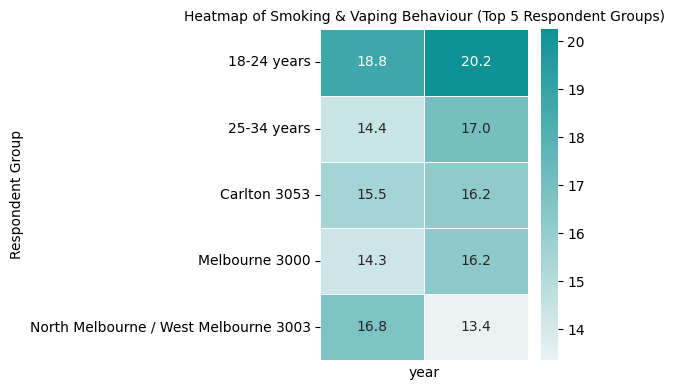

In [55]:


smoke_vape_df = df[df['response'].isin(target_responses)]

#Indentifying the top 5 respondent groups with the highest average result
top5_smoke_vape_groups = (
    smoke_vape_df.groupby('respondent_group')['result']
    .mean()
    .reset_index()
    .sort_values(by='result', ascending=False)
    .head(5)
)

top5_groups = top5_smoke_vape_groups['respondent_group']
df_top5 = smoke_vape_df[smoke_vape_df['respondent_group'].isin(top5_groups)]
heatmap_data = df_top5.groupby(['respondent_group', 'year'])['result'].mean().unstack()

#Customising color palette
custom_cmap = sns.light_palette("#0f9295", as_cmap=True)


plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap=custom_cmap, linewidths=0.5)


plt.xticks([], [])
plt.ylabel("Respondent Group")
plt.title("Heatmap of Smoking & Vaping Behaviour (Top 5 Respondent Groups)", fontsize=10)
plt.tight_layout()
plt.show()


I grouped the filtered dataset (df_top5) by respondent_group to calculate the average sample size and average result (percentage reporting smoking/vaping) for each group. Then, I estimated the actual number of people who reported this behaviour by multiplying the average result percentage by the average sample size, providing a clearer picture of the potential impact in each group.

In [56]:
summary = (
    df_top5.groupby('respondent_group')
    .agg(
        avg_sample_size=('sample_size', 'mean'),
        avg_result=('result', 'mean')
    )
    .reset_index()
)

#Calculate the actual number of people who reported smoking/vaping behaviour
summary['Reported_count'] = (summary['avg_result'] / 100) * summary['avg_sample_size']


summary = summary.sort_values(by='avg_result', ascending=False)
print(summary)


                        respondent_group  avg_sample_size  avg_result  \
0                            18-24 years            340.0      19.500   
2                           Carlton 3053            182.5      15.875   
1                            25-34 years            443.0      15.700   
3                         Melbourne 3000            349.0      15.275   
4  North Melbourne / West Melbourne 3003            223.0      15.075   

   Reported_count  
0       66.300000  
2       28.971875  
1       69.551000  
3       53.309750  
4       33.617250  


From the heatmap, it is evident that the 18–24 age group reports the highest levels of smoking and vaping behaviour, with a slight increase observed between 2022 and 2023. This trend highlights a significant area of concern, particularly among younger adults. In addition to age-based insights, specific suburbs such as North Melbourne 3051, West Melbourne 3003, and Carlton 3053 also show consistently high reported rates.

To quantify the issue, 66 out of 340 respondents aged 18–24 reported smoking or vaping behaviour, reflecting a substantial proportion of that demographic. These findings suggest that the City of Melbourne could benefit from implementing targeted health initiatives and awareness campaigns in both the affected age group and high-risk localities to help reduce the growing rate of smoking and vaping.

## Analysing Trends in Knowledge of Aboriginal Culture in the City of Melbourne

In [57]:
aboriginal_df = df[df['topic'].str.lower() == 'knowledge of aboriginal culture']

# Get unique descriptions for the topic 'knowledge of aboriginal culture' to understand the survey
unique_descriptions = aboriginal_df['description'].unique()


print("Descriptions under the topic 'Knowledge of Aboriginal culture':")
for desc in unique_descriptions:
    print(f"- {desc}")


Descriptions under the topic 'Knowledge of Aboriginal culture':
- Aware of traditional owners of Melbourne
- Self assessment of Aboriginal and Torrest Strait Islander people histories and cultures


I filtered the dataset to include only percentage-based responses related to knowledge of Aboriginal culture. Then, I grouped the data by respondent_group to calculate the average sample size and average result, and estimated the number of respondents not aware of Aboriginal culture by subtracting the estimated aware count from the sample size. This provides insight into which groups may benefit from more cultural education or engagement initiatives.

In [58]:
aboriginal_df = df[
    (df['topic'].str.lower() == 'knowledge of aboriginal culture') &
    (df['format'].str.lower() == 'per cent')
].copy()

summary_ab = (
    aboriginal_df.groupby('respondent_group')
    .agg(
        avg_sample_size=('sample_size', 'mean'),
        avg_result=('result', 'mean')
    )
    .reset_index()
)

# Estimate the number of respondents who did not report knowledge of Aboriginal culture
summary_ab['Not aware'] = summary_ab['avg_sample_size'] - ((summary_ab['avg_result'] / 100) * summary_ab['avg_sample_size'])


summary_ab = summary_ab.sort_values(by='avg_result', ascending=False)
summary_ab = summary_ab.round({
    'avg_sample_size': 0,
    'avg_result': 2,
    'Reported_count': 0
})

print("Estimated awareness of Aboriginal culture by respondent group:")
print(summary_ab)


Estimated awareness of Aboriginal culture by respondent group:
                                     respondent_group  avg_sample_size  \
3                                         45-54 years            123.0   
4                                         55-64 years            116.0   
9                                 East Melbourne 3002             86.0   
14              North Melbourne / West Melbourne 3003            214.0   
5                                           65+ years            203.0   
2                                         35-44 years            195.0   
6                                        Carlton 3053            154.0   
8                                      Docklands 3008            113.0   
11                       Kensington / Flemington 3031            117.0   
15                                     Parkville 3052             88.0   
0                                         18-24 years            326.0   
12                                               

From the above results, it is evident that knowledge of Aboriginal culture remains consistently low across all respondent groups in the City of Melbourne. This suggests that cultural awareness is a widespread gap, regardless of age, gender, or residential location. Given the significance of acknowledging and respecting Aboriginal heritage, this finding highlights a clear opportunity for local government and councils to take proactive initiatives.

Some potential initiatives could include:

- Partnering with local Aboriginal communities to co-create public events, workshops, or storytelling sessions

- Developing cultural awareness campaigns across schools, universities, and workplaces

- Installing more visible Aboriginal art, language, and signage in public spaces

These actions could help foster deeper understanding, strengthen cultural respect, and contribute to a more inclusive community.

## Analysing trends in Food Security

In [59]:
print("Unique Descriptions:\n")
print(df[df['topic'].str.contains("Food security", case=False, na=False)]['description' ].unique(),"\n")
print("Unique Responses:\n")
print(df[df['topic'].str.contains("Food security", case=False, na=False)]['response' ].unique())


Unique Descriptions:

['Experienced food insecurity (worried food would run out and/or skipped meals and/or ran out of food)'
 'Worried food would run out' 'Skipped meals' 'Ran out of food'
 'Experienced food insecurity (worried food would run out and/or skipped meals and/or ran out of food and/or accessed emergency food relief services)'
 'Accessed emergency food relief services'] 

Unique Responses:

['Yes, in the last 12 months']


I filtered the dataset to include only rows related to Food Security, then grouped the data by respondent_group to calculate the average result for each group. Finally, I identified the top 5 respondent groups with the highest average scores, which helps highlight the groups most affected by food security issues.

In [60]:
food_security_df = df[df['topic'].str.contains("Food security", case=False, na=False)]

# Group by respondent group
# and calculate the mean result percentage
top_respondents = (
    food_security_df.groupby("respondent_group")["result"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

print(top_respondents)


    respondent_group     result
0        18-24 years  28.954545
1       Carlton 3053  25.727273
2     Melbourne 3000  22.759091
3  City of Melbourne  21.509574
4        25-34 years  21.036364


Here, I’m identifying the top 5 most affected respondent groups for each year from 2018 to 2023 based on their average Food Security scores.

In [61]:
food_security_df = df[df['topic'].str.contains("Food security", case=False, na=False)]

# Group by year and respondent group, and calculate the average result
grouped = (
    food_security_df.groupby(["year", "respondent_group"])["result"]
    .mean()
    .reset_index()
)

top5_each_year = (
    grouped.groupby("year", group_keys=False)
    .apply(lambda x: x.nlargest(5, "result"))
    .reset_index(drop=True)
)

# Display the result
print(top5_each_year)


    year                                   respondent_group  result
0   2018                                        18-24 years  25.350
1   2018                                East Melbourne 3002  25.150
2   2018                                       Carlton 3053  23.775
3   2018                                        25-34 years  21.075
4   2018                                             Female  20.975
5   2019                                     Melbourne 3000  23.125
6   2019                                        18-24 years  23.100
7   2019                                       Carlton 3053  23.000
8   2019  South Yarra 3141 / Melbourne (St Kilda Road) 3004  21.750
9   2019                                        25-34 years  19.875
10  2020                                        18-24 years  36.825
11  2020                                       Carlton 3053  30.925
12  2020                                     Melbourne 3000  28.900
13  2020                                        

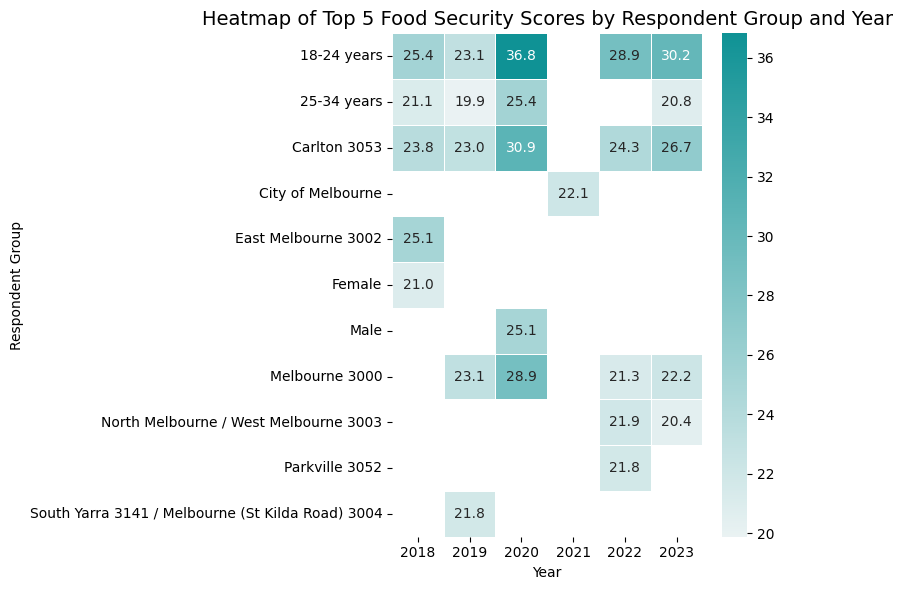

In [62]:

pivot = top5_each_year.pivot(index='respondent_group', columns='year', values='result')

custom_cmap = sns.light_palette("#0f9295", as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap=custom_cmap, fmt=".1f", linewidths=0.5)

plt.title("Heatmap of Top 5 Food Security Scores by Respondent Group and Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Respondent Group")
plt.tight_layout()
plt.show()


From the above heatmap, we can see that the percentage of people who reported experiencing food insecurity was slightly higher in 2020, likely due to the impact of the COVID-19 pandemic. This trend is particularly evident among younger age groups such as 18–24 years and 25–34 years, who may have experienced greater economic instability during that time. Overall, the heatmap clearly highlights key groups the council should focus on when addressing food insecurity—especially younger age groups and residents of areas like Carlton 3053 and Melbourne 3000, where vulnerability appears to be consistently higher.

To address the food insecurity challenges identified in the above analysis, the council can consider the following initiatives:

- Promote employment opportunities targeted at young adults to enhance their financial stability and reduce their vulnerability to food insecurity.

- Provide subsidised groceries or meal support to individuals and families in genuine need, particularly in high-risk areas like Carlton and Melbourne 3000.

## Wellbeing Indicator Trends by Age Group

In this section, I visualised trends in selected wellbeing indicators across different age groups from 2018 to 2023. I filtered the data for specific age groups and topics of interest, grouped the results by year, respondent group, and topic, and then plotted the average scores for each indicator over time. This allows us to observe how perceptions and wellbeing outcomes have changed across age demographics for key indicators such as physical activity, subjective wellbeing, and safety.

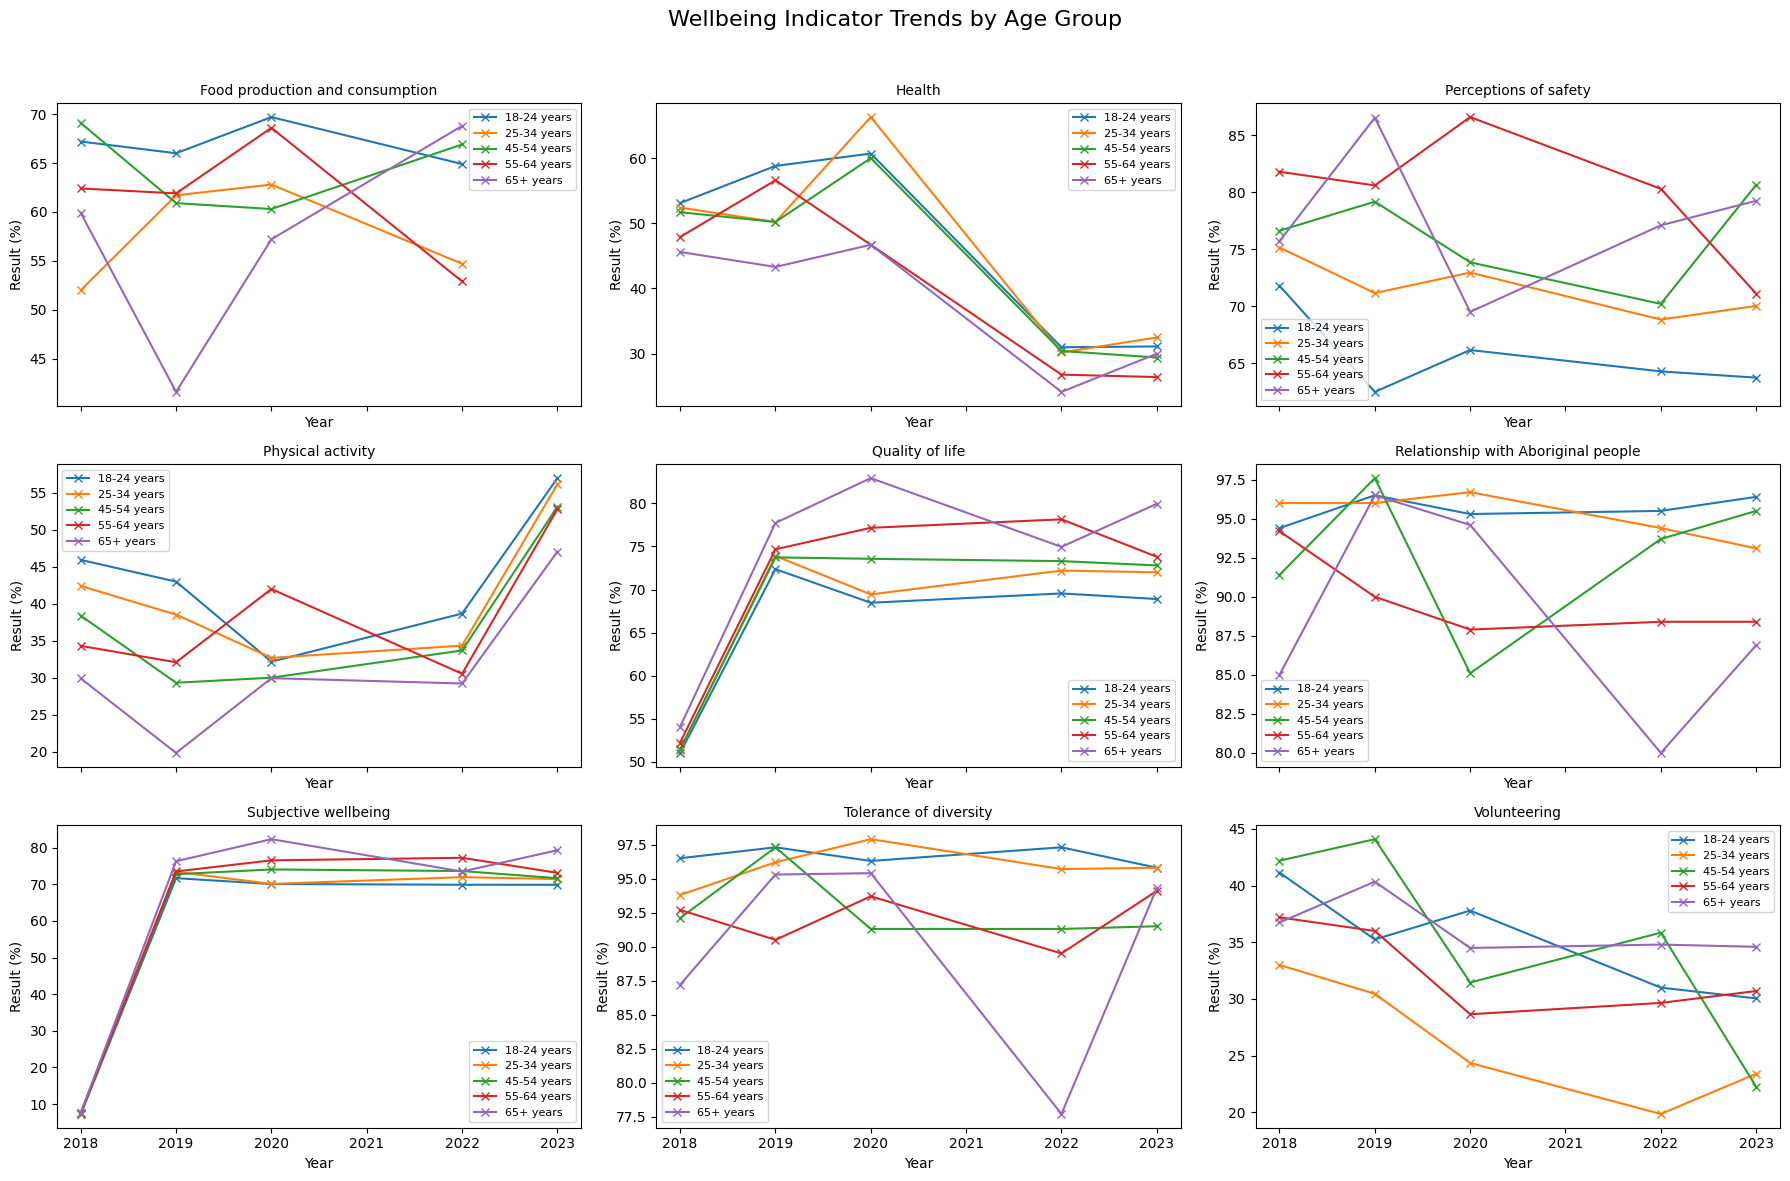

In [63]:

age_groups = ['18-24 years', '25-34 years', '45-54 years', '55-64 years', '65+ years']
topics_of_interest = ['Physical activity','Health', 'Perceptions of safety', 'Subjective wellbeing',
 'Quality of life' ,'Tolerance of diversity' , 'Relationship with Aboriginal people',
 'Food production and consumption' ,'Volunteering']

# Filter data
age_df = df[df['respondent_group'].isin(age_groups)]
age_df = age_df[age_df['topic'].isin(topics_of_interest)]

# Group data
grouped_df = (
    age_df.groupby(['year', 'respondent_group', 'topic'])['result']
    .mean()
    .reset_index()
)

topics = grouped_df['topic'].unique()
n_topics = len(topics)
n_cols = 3
n_rows = (n_topics + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows), sharex=True)
axes = axes.flatten()

# Plot each topic
for i, topic in enumerate(topics):
    ax = axes[i]
    topic_data = grouped_df[grouped_df['topic'] == topic]
    for age_group in age_groups:
        line = topic_data[topic_data['respondent_group'] == age_group]
        ax.plot(line['year'], line['result'], marker='x', label=age_group)
    
    ax.set_title(topic, fontsize=10)
    ax.set_xlabel("Year")
    ax.set_ylabel("Result (%)")
    ax.legend(fontsize=8)
    

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle("Wellbeing Indicator Trends by Age Group", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


This multi-line chart highlights how various wellbeing indicators have changed over time across five age groups. Notable insights include:

- Subjective wellbeing and quality of life remained relatively high and stable across all age groups after 2019.

- Health scores declined significantly across all groups post-2020, likely reflecting the impact of the COVID-19 pandemic on both mental and physical health.

- Volunteering shows a consistent downward trend, particularly among the 25–34 and 65+ age groups.

- Tolerance of diversity and relationship with Aboriginal people remain high overall, though some fluctuations are seen in the 65+ group.

- Food production and consumption and physical activity show varied trends, with most age groups improving noticeably by 2023.

- Perceptions of safety vary across age groups, with the 65+ years group experiencing the most significant fluctuations over the years.

- Several steep declines are observed in the 65+ age group across different indicators and years, indicating that this group may require more focused attention and support from the council to address their wellbeing concerns.

## Visualising Perceptions of Safety by Gender

In this section, I analysed perceptions of safety across different descriptions, segmented by gender and year. I grouped the data to calculate the average result for each combination of year, respondent_group, and description, then assigned numeric codes to each description to simplify the x-axis labels. Finally, I created a faceted bar chart to compare perceptions of safety in males and females over time.

Description Code Legend:
0: Feel safe by yourself in your neighbourhood - at night
1: Feel safe by yourself in your neighbourhood - during the day
2: Feel safe by yourself on public transport in and around City of Melbourne - at night
3: Feel safe by yourself on public transport in and around City of Melbourne - during the day


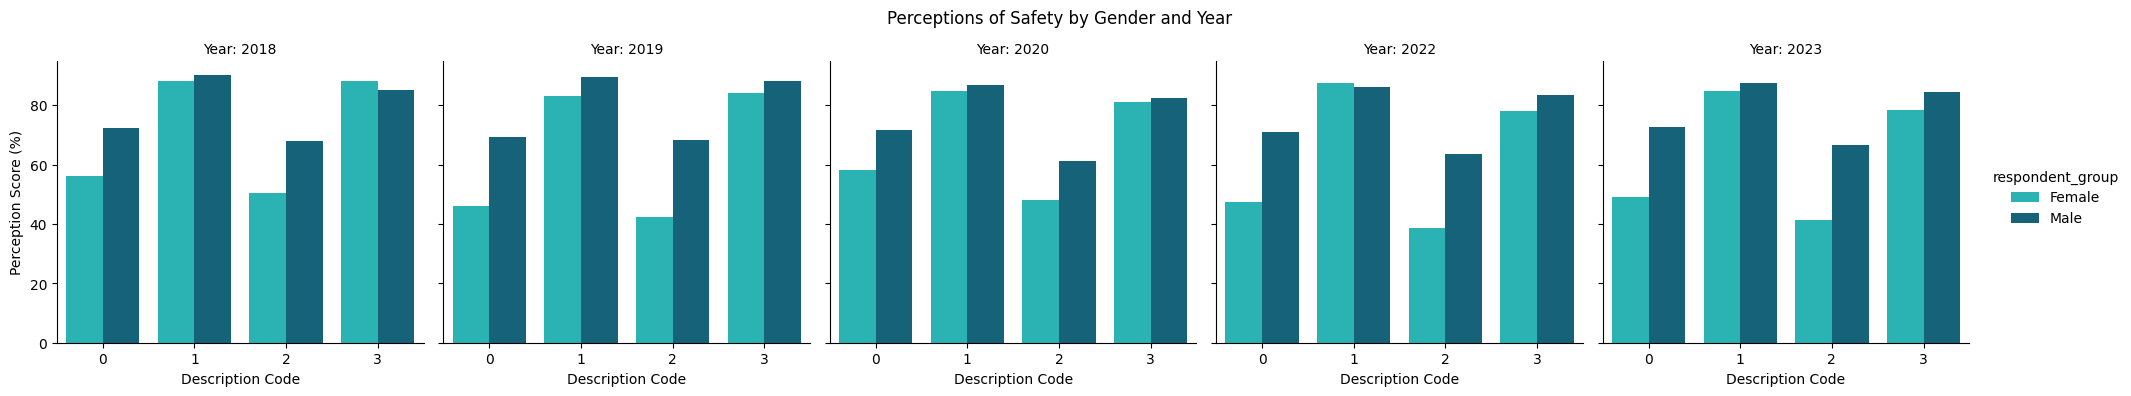

In [64]:


# Filter data
safety_df = df[
    (df['topic'].str.lower() == 'perceptions of safety') &
    (df['respondent_group'].str.lower().isin(['male', 'female']))
]

# Group by year, gender, and description
grouped = (
    safety_df.groupby(['year', 'respondent_group', 'description'])['result']
    .mean()
    .reset_index()
)

# Assign numeric codes to each description
desc_lookup = {desc: i for i, desc in enumerate(grouped['description'].unique())}
inv_desc_lookup = {i: desc for desc, i in desc_lookup.items()}
grouped['desc_code'] = grouped['description'].map(desc_lookup)

custom_colors = ['#14c9cb', '#056b8a']  # Light teal and deep teal

# Plot grouped bar chart with description codes and custom colors
g = sns.catplot(
    data=grouped,
    x="desc_code", y="result", hue="respondent_group",
    col="year", kind="bar", height=4, aspect=1,
    palette=custom_colors
)

g.set_axis_labels("Description Code", "Perception Score (%)")
g.set_titles("Year: {col_name}")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Perceptions of Safety by Gender and Year")

print("Description Code Legend:")
for code, desc in inv_desc_lookup.items():
    print(f"{code}: {desc}")


From the above bar chart, we can see that males consistently report higher perceptions of safety than females across all four scenarios and throughout the years 2018 to 2023. The gender gap is most evident in situations involving being alone at night, whether in neighbourhoods or on public transport (Description Codes 0 and 2). While overall safety perceptions have remained relatively stable, the consistently lower scores for females highlight the need for focused action. The council can take initiatives such as improving street lighting, increasing visibility of patrols in public areas, launching community safety programmes, and promoting safe public transport options at night to enhance the sense of safety for women across the city.

## Trends in Wellbeing Indicators – City of Melbourne

I filtered the data to include only responses from the City of Melbourne and calculated the average result for each topic by year. Then, I created line charts to show how each wellbeing indicator has changed over time.

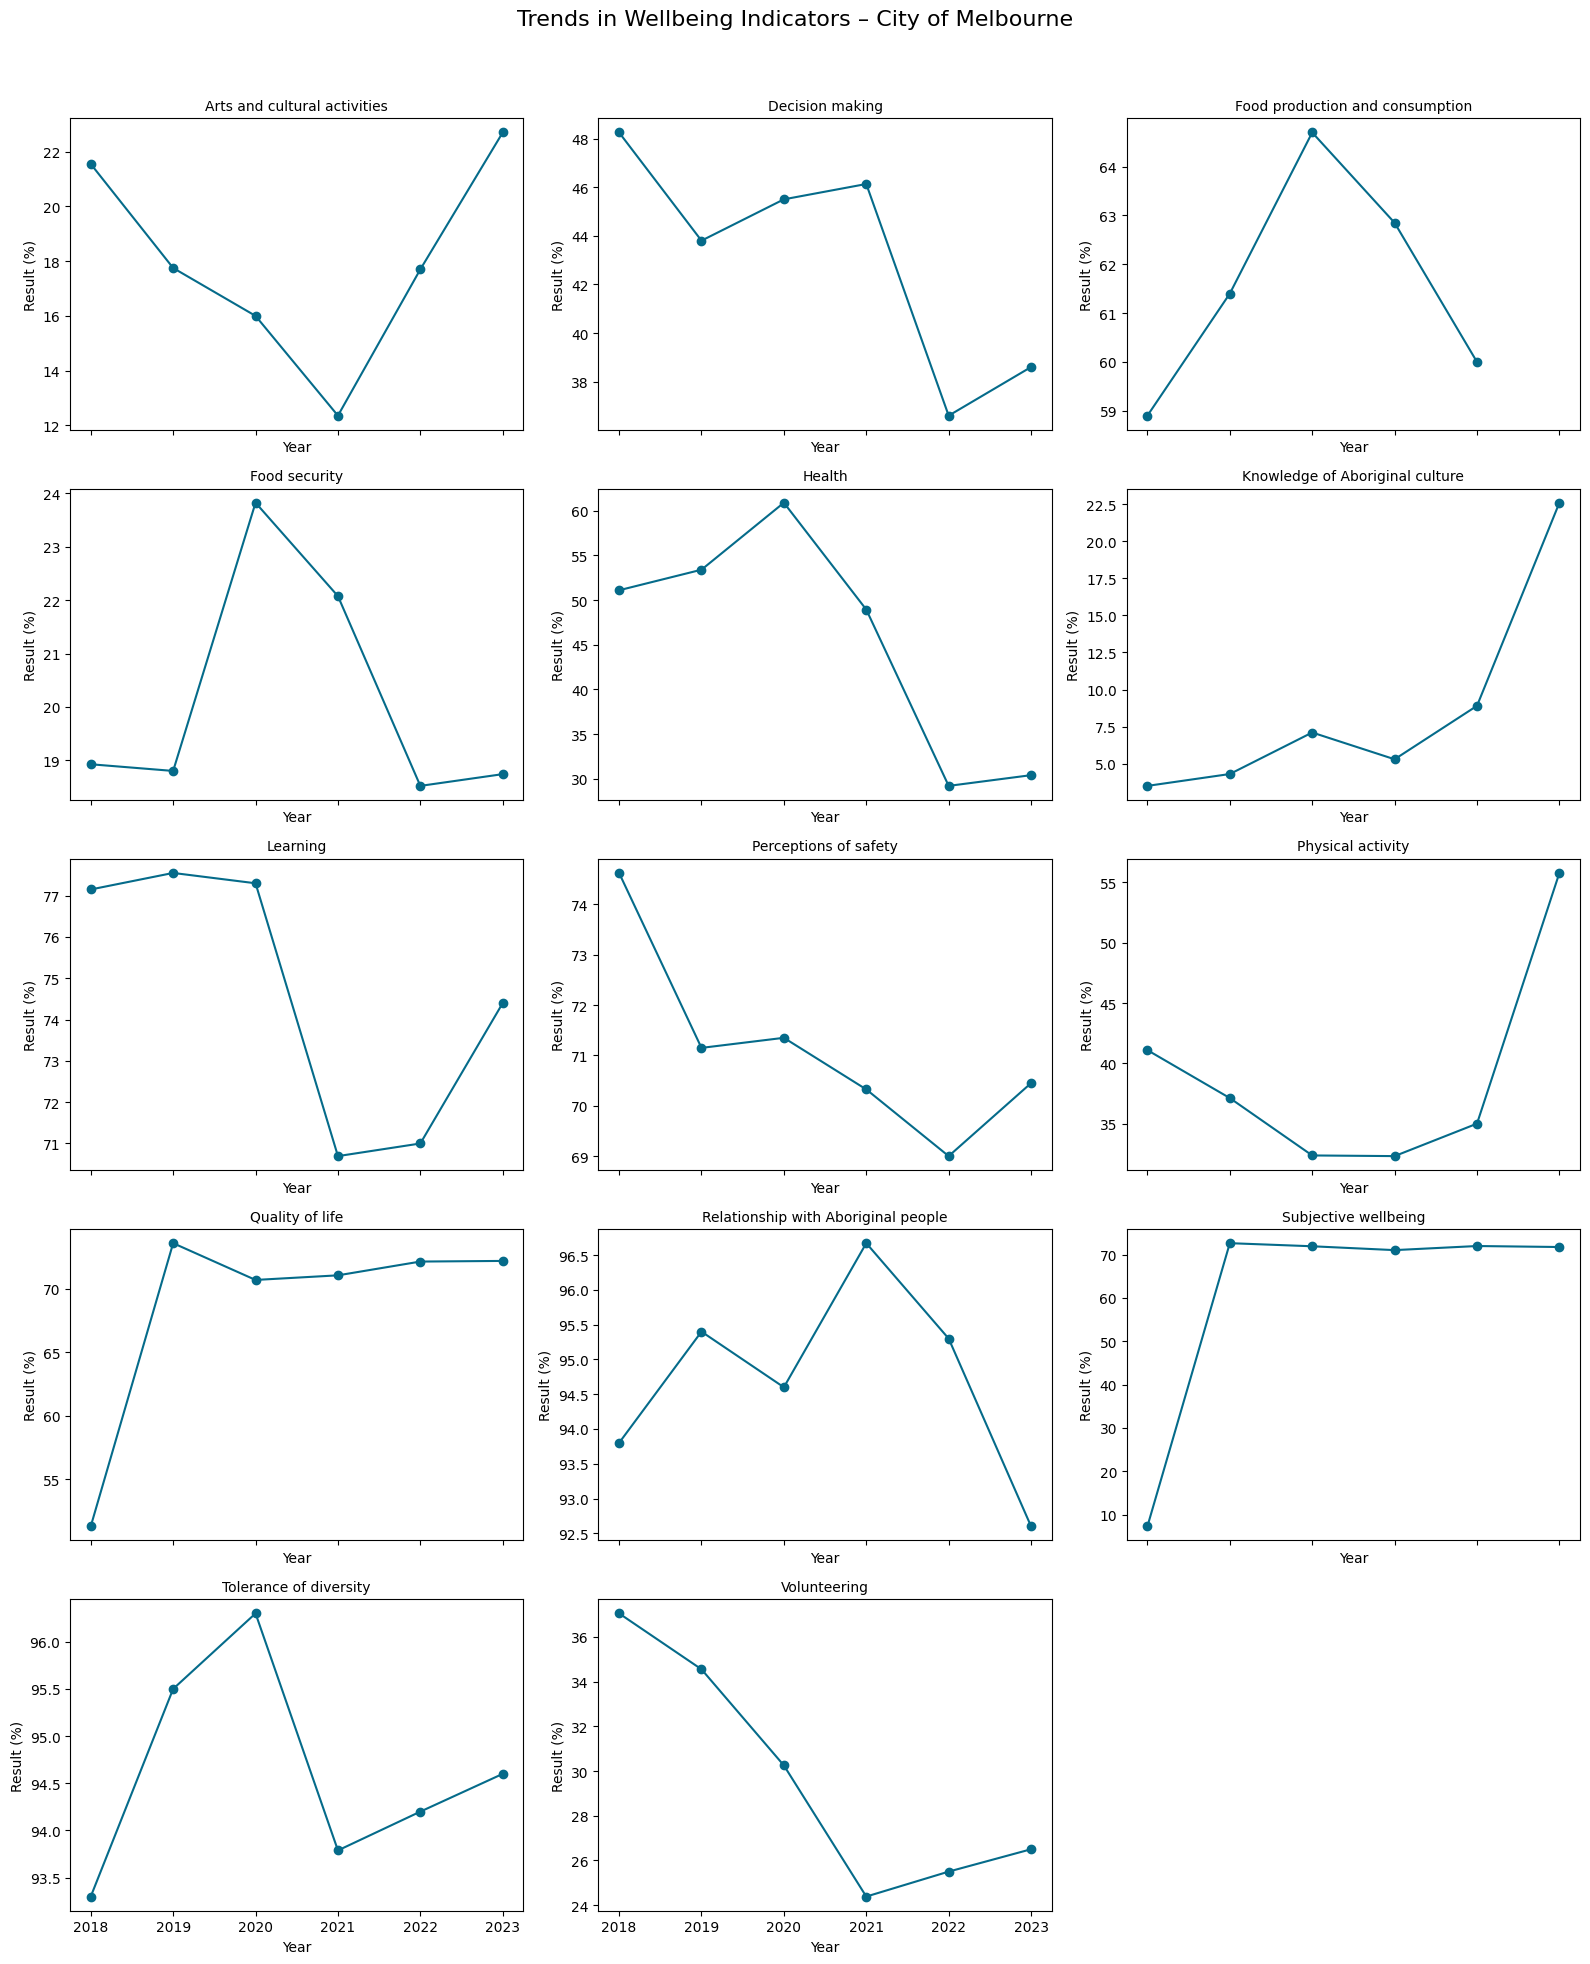

In [65]:
# Filter for City of Melbourne
city_df = df[df['respondent_group'].str.lower() == 'city of melbourne']

# Group by year and topic
grouped_df = (
    city_df.groupby(['year', 'topic'])['result']
    .mean()
    .reset_index()
)

topics = grouped_df['topic'].unique()
n_topics = len(topics)
n_cols = 3
n_rows = (n_topics + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows), sharex=True)
axes = axes.flatten()

# Plot each topic trend using the custom line color
for i, topic in enumerate(topics):
    ax = axes[i]
    topic_data = grouped_df[grouped_df['topic'] == topic]
    ax.plot(topic_data['year'], topic_data['result'], marker='o', color='#056b8a', label='City of Melbourne')
    
    ax.set_title(topic, fontsize=10)
    ax.set_xlabel("Year")
    ax.set_ylabel("Result (%)")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle("Trends in Wellbeing Indicators – City of Melbourne", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


The charts highlight how various wellbeing indicators have changed over time in the City of Melbourne. While indicators like quality of life, subjective wellbeing, and tolerance of diversity remained relatively high and stable, others such as health, food security, and especially volunteering showed noticeable declines in recent years. For example, tolerance of diversity stayed high from 2018 to 2023, with a slight dip in 2021 and gradual recovery. In contrast, volunteering steadily decreased, reaching its lowest point in 2021 and showing only a minor improvement afterward. From these visualisations, the council can get a clearer overview of trends across all wellbeing indicators in the City of Melbourne, helping them identify which areas need targeted intervention, support, or community programs to improve overall wellbeing.

## Principal Component Analysis (PCA) of Wellbeing Indicators 

In this step, I performed Principal Component Analysis (PCA) to reduce the complexity of the wellbeing indicator data and visualise patterns among respondent groups. After creating a pivot table with average results for each topic by group and standardising the data, I applied PCA to project the data into two principal components. The resulting scatterplot shows how closely different groups relate to each other based on their wellbeing profiles, with closer points indicating similar patterns. Additionally, I examined the topic loadings on each principal component to understand which indicators contribute most to the variation. This helps the council identify key wellbeing drivers and differences across community segments.

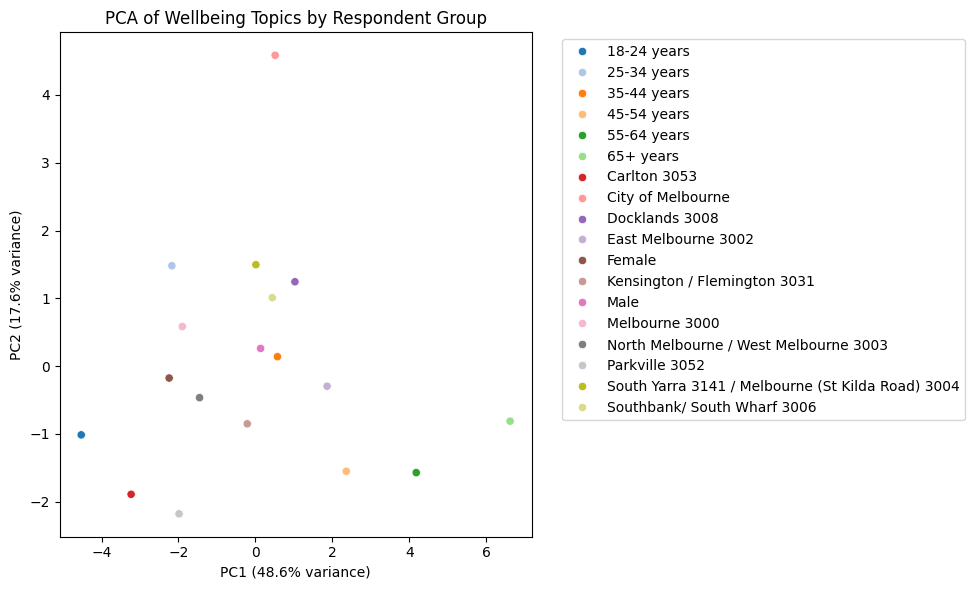


Topic Loadings on Principal Components:
                                          PC1       PC2
topic                                                  
Quality of life                      0.334761  0.121639
Perceptions of safety                0.318817 -0.005480
Decision making                      0.251307 -0.317131
Subjective wellbeing                 0.224291  0.331943
Knowledge of Aboriginal culture      0.166085 -0.458758
Volunteering                         0.000734 -0.522226
Food production and consumption     -0.107241 -0.161604
Health                              -0.111456  0.383634
Arts and cultural activities        -0.284910 -0.234163
Physical activity                   -0.285162 -0.144419
Relationship with Aboriginal people -0.314005  0.120691
Tolerance of diversity              -0.335387 -0.035856
Learning                            -0.343692 -0.096753
Food security                       -0.360031  0.130551


In [66]:

pivot_df = df.pivot_table(
    index='respondent_group',  
    columns='topic',
    values='result',
    aggfunc='mean'
).dropna()

#Standardise the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_df)

# Apply PCA 
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['respondent_group'] = pivot_df.index

#Plot the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='respondent_group', palette='tab20')
plt.title('PCA of Wellbeing Topics by Respondent Group')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

loadings = pd.DataFrame(pca.components_.T, index=pivot_df.columns, columns=['PC1', 'PC2'])
print("\nTopic Loadings on Principal Components:")
print(loadings.sort_values(by='PC1', ascending=False))


Based on the PCA loadings, PC1 (explaining 48.6% of the variance) reflects overall wellbeing satisfaction, with higher values linked to indicators such as quality of life, perceptions of safety, decision-making, and subjective wellbeing, and lower values associated with food security, learning, tolerance of diversity, and relationships with Aboriginal people. PC2 (17.6% variance) captures a contrast between personal health and subjective wellbeing (positive loadings) versus lower engagement in volunteering and cultural knowledge (negative loadings). Together, these components differentiate respondent groups based on their wellbeing profiles, providing valuable insights for the council to identify distinct community needs and tailor programmes and initiatives more effectively.

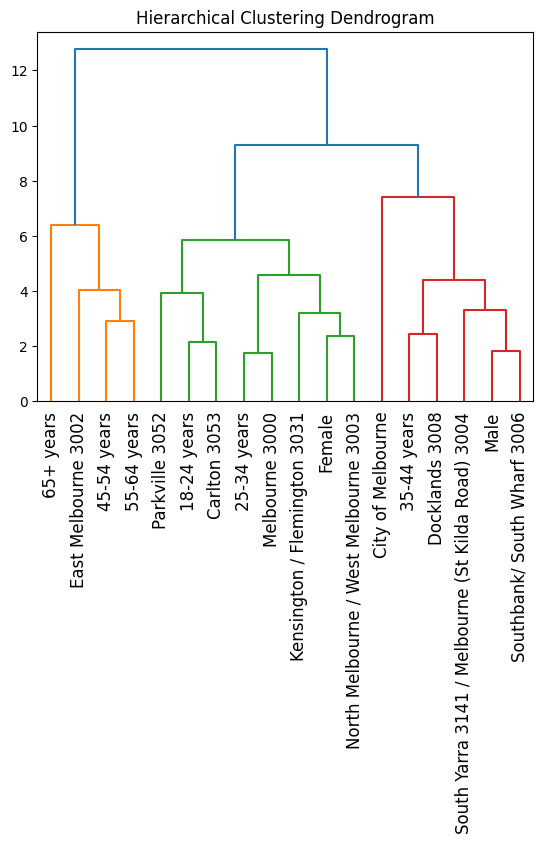

In [67]:

link = linkage(scaled_data, method='ward')
dendrogram(link, labels=pivot_df.index, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


From the above hierarchical clustering dendrogram, we can identify three main clusters that group respondent segments with similar wellbeing profiles. The first cluster includes older age groups (45–54, 55–64, and 65+ years) along with East Melbourne 3002, suggesting shared wellbeing patterns likely linked to retirement and stable lifestyles. The second cluster brings together younger age groups (18–34 years), Carlton, Parkville, and Melbourne 3000, which likely reflects student life or early-career urban living. The third cluster groups male respondents, Southbank, Docklands, and the 35–44 age group, indicating patterns associated with high-density, professional, or mobile populations. These insights allow the council to design targeted wellbeing initiatives and focus their efforts on specific age groups within key areas of Melbourne.

## Correlation Matrix of Wellbeing Indicators

In this step, I calculated the correlation between different wellbeing topics to see how they are related. 

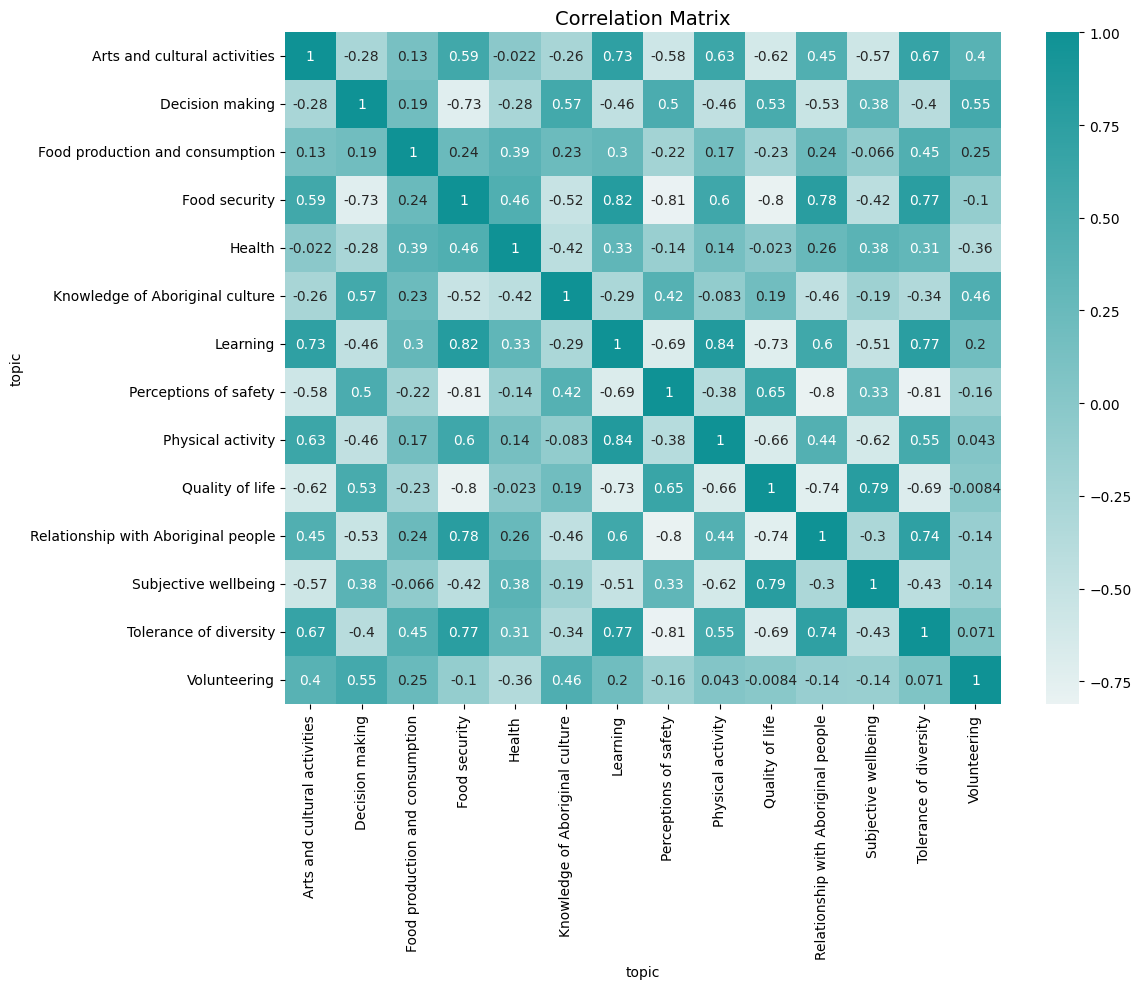

In [68]:
corr = pivot_df.corr().round(2)

plt.figure(figsize=(12, 10))  # Width, Height in inches

sns.heatmap(pivot_df.corr(), annot=True, cmap=custom_cmap)

plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()


Understanding the correlation between wellbeing indicators helps reveal how different aspects of community wellbeing are related, allowing the council to plan more effective and integrated initiatives. In the above heatmap, for example, learning and food security show a strong positive correlation (0.82), while perceptions of safety has a strong negative correlation with food security (-0.81). These patterns suggest that improving one area could positively influence others. By identifying such connections, the council can design strategies that address multiple issues at once. For instance, they could offer community education programs that include budgeting, nutrition, and meal planning to strengthen both learning and food security.These integrated initiatives can make council efforts more impactful and sustainable.

## Results

Throughout this use case, I analysed trends across multiple wellbeing indicators from 2018 to 2023, revealing key patterns and concerns in areas such as food security, smoking and vaping behaviour, safety, and community engagement. The analysis identified several notable findings:

- Low knowledge of Aboriginal culture was consistent across all respondent groups, indicating a need for targeted awareness and cultural education initiatives.

- Food insecurity was more prevalent among younger age groups (18–34 years), likely linked to job instability and economic challenges.

- Older age groups reported lower satisfaction in several wellbeing indicators in specific years, suggesting the need for age-specific support programs.

- Females consistently reported lower perceptions of safety compared to males, highlighting a persistent gender gap that warrants focused intervention.

- Cluster analysis revealed that younger individuals, inner suburbs like Carlton (3053) and Parkville (3052), and the female respondent group share similar wellbeing profiles.

- Strong positive correlations were found between indicators such as learning, participation in arts and cultural activities, perception of safety, and quality of life — offering valuable guidance for integrated policy development.

These findings provide a solid foundation for the council to implement more informed, inclusive, and targeted wellbeing strategies across Melbourne.
  


## Recommendations

- Develop interactive community programs, workshops, and school partnerships to improve knowledge and appreciation of Aboriginal culture across all age groups.

- Introduce subsidised food programs, support youth employment, and collaborate with local organisations to provide food relief targeted at the 18–34 age group.

- Launch age-friendly initiatives, such as wellbeing check-ins, social engagement programs, and tailored health services to improve satisfaction in key wellbeing areas.

- Improve urban lighting, increase visible police presence in high-concern areas, and implement community-led safety initiatives focused on women's experiences and needs.

- Co-design wellbeing initiatives with residents in inner suburbs like Carlton and Parkville to address shared challenges identified through cluster analysis.

- Create multi-dimensional programs that combine education, creativity, and community safety, leveraging strong correlations between learning, arts and cultural engagement, safety perception, and quality of life.

- Ensure future surveys capture demographic attributes like gender and location as separate variables to enable more detailed and actionable insights.


## References

[1] City of Melbourne Open Data Team. (2024, April 22). Social indicators for City of Melbourne residents 2022 [Data set]. City of Melbourne. https://data.melbourne.vic.gov.au/explore/dataset/social-indicators-for-city-of-melbourne-residents-2022/information/

[2] Chambliss, C. (2019, March 30). Cleaning, analyzing, and visualizing survey data in Python. Medium. 
https://medium.com/data-science/cleaning-analyzing-and-visualizing-survey-data-in-python-42747a13c713

[3] Bock, T. (n.d.). What is a dendrogram? Displayr. https://www.displayr.com/what-is-dendrogram/

[4] Shivam, S. (n.d.). PCA for survey analysis. RPubs. https://rpubs.com/Shreyansh_Shivam/604562